follow on https://www.youtube.com/watch?v=1O_BenficgE

In [41]:
import yfinance as yf
import pandas as pd
import datetime as dt

## Get data with ticker 

In [6]:
Ticker_Name = '^GSPC'
sp500 = yf.Ticker(Ticker_Name)
sp500_df = sp500.history(period="max")
del sp500_df['Dividends']
del sp500_df['Stock Splits']



## Ploting and info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 5620.85,
 'open': 5637.77,
 'dayLow': 5560.95,
 'dayHigh': 5643.22,
 'regularMarketPreviousClose': 5620.85,
 'regularMarketOpen': 5637.77,
 'regularMarketDayLow': 5560.95,
 'regularMarketDayHigh': 5643.22,
 'volume': 2194647000,
 'regularMarketVolume': 2194647000,
 'averageVolume': 3845202741,
 'averageVolume10days': 3433956000,
 'averageDailyVolume10Day': 3433956000,
 'bid': 5524.29,
 'ask': 5629.24,
 'fiftyTwoWeekLow': 4103.78,
 'fiftyTwoWeekHigh': 5669.67,
 'fiftyDayAverage': 5479.491,
 'twoHundredDayAverage': 5084.828,
 'currency': 'USD',
 'exchange': 'SNP',
 'quoteType': 'INDEX',
 'symbol': '^GSPC',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500',
 'longName': 'S&P 500',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EDT',
 'uuid': '8ffd55d1-3d1d-3733-a480-56768bc708e6',
 'messageBoardId': 'finmb_INDEXGSPC',
 'gmtOffSetMilliseconds': -14400000,
 'trailingPegRatio': N

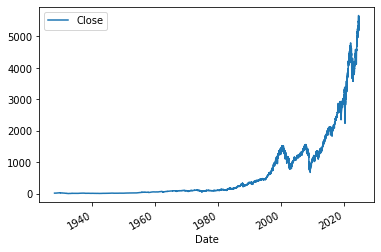

In [17]:
sp500_df.plot.line(y='Close')
sp500.info

## Goal for Model
The goal for this particular model is just to predict whether the stock will go up or down the next day, not the exact price of the stock.

We will do this by determining if tomorrows closing price is bigger that todays closing price

In [89]:
sp500_df['Tomorrow'] = sp500_df['Close'].shift(-1) #tomorrow column is just close shifted back one
sp500_df['Target'] = (sp500_df['Tomorrow'] > sp500_df['Close']).astype(int) #test if tomorrow bigger than close (today)
sp500_df = sp500_df.loc['1990-01-01 00:00:00-05:00':].copy() #get rid of data before 1990
display(sp500_df)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-08-16 00:00:00-04:00,5530.500000,5561.979980,5525.169922,5554.250000,3357690000,5608.250000,1
2024-08-19 00:00:00-04:00,5557.229980,5608.299805,5550.740234,5608.250000,3222050000,5597.120117,0
2024-08-20 00:00:00-04:00,5602.879883,5620.509766,5585.500000,5597.120117,2994420000,5620.850098,1


Remove data that came before 1990

## Create initial models.

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

### Train model (Random Forest Clas) it was dog water

In [100]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500_df.iloc[:-100]
test = sp500_df.iloc[-100:]

predictors = ['Close', 'Open', 'High', 'Low', 'Volume']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

#### Test accuracy 

In [105]:
preds = model.predict(test[predictors]) #outputs a np array
preds = pd.Series(preds,  index = test.index) #Converts to pandas seriese

In [107]:
precision_score(test['Target'], preds)

0.5625

## Back Testing method

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500_df.iloc[:-100]
test = sp500_df.iloc[-100:]
predictors = ['Close', 'Open', 'High', 'Low', 'Volume']

In [108]:
def predict(train, test, predictors, model): 
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors]) #outputs a np array
    preds = pd.Series(preds,  index = test.index, name = 'Predictions') #Converts to pandas seriese
    combined = pd.concat(test['Target'], preds, axis=1)
    return combined

for the backtesting func we'll take about 10 years of data (each year has approx trading 250 days) and train it on the 10 years and test on the 11th, then train on the first 11 years and test on the 12th, etc.

In [109]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = [] #list of df's of predictions for a single year

    for i in range(start, data.shape[0], step): 
        

IndentationError: expected an indented block (2301138747.py, line 4)